In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import spearmanr
import plotly.express as px
import warnings

#Machine learning libraries
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier

#PCA libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from yellowbrick.features import PCA as ybPCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [2]:
# Read CSV file
df = pd.read_csv('Formulario_sobre_la_concentración_p4_209_resp.csv')
df.head()

,Marca temporal,"Por favor, indique si está dispuesto a compartir los datos proporcionados en este cuestionario, excluyendo su dirección de correo electrónico y los comentarios que pueda hacer al final, para la investigación y análisis de los factores que afectan la concentración y atención. Tenga en cuenta que los datos compartidos serán tratados de forma anónima, y se utilizarán únicamente con fines académicos y científicos relacionados con el estudio mencionado. Los resultados serán publicados en la siguiente cuenta de GitHub: https://github.com/mafaves o mandados al correo si así lo indica posteriormente.",Edad,Genero,Email\n\nNota: Introduzca el email solo si desea recibir en su correo electrónico los resultados de este cuestionario. Este email no será compartido ni publicado en ningún momento.,¿Cuántos minutos considera que puede mantenerse concentrado en su día a día sin distracciones?,"Del 1 al 10, ¿cuál considera que es su nivel de estrés generalmente?","Del 1 al 10, ¿cómo de feliz se considera?","¿Cuántas horas a la semana se relaciona con amigos y familiares (no convivientes) fuera de las redes sociales y trabajo (oficina, clases...)?",¿Cuántas horas al día suele dormir?,¿Cuánto tiempo al día dedica a la meditación?,¿Cuánto tiempo al día le dedica a la lectura?,"¿Cuánto tiempo al día crees que deja a su mente divagar libremente (por ejemplo, paseo, transporte o ducha sin uso de distracciones como música o el móvil)?",¿Cuántas horas a la semana dedica a hacer deporte?,"¿Cuántas bebidas alcohólicas (cervezas, vasos de vino, cubatas...) suele consumir a lo largo de la semana?","¿Cuántas horas al día utiliza las redes sociales? \nNota: Dada las comunes distorsiones en la autopercepción de estos tiempos, puede entrar en la configuración de su dispositivo y comprobar la media (en Android: Configuración -> Bienestar digital y control parental; en IPhone: Configuración -> Tiempo de uso).","¿Qué tipo de notificaciones tiene activadas en la redes sociales (Instagram, Facebook, Twitter...)? \nSeleccione todas las que tenga activadas:","¿Tiene el móvil a la vista o al alcance de su mano cuando se encuentra realizando tareas que requieran concentración (como estudiar, trabajar, hacer deporte, leer…)?","Espacio para comentar cualquier inquietud, duda o dato que desee compartir conmigo."
0,25/05/2023 11:23:57,"Sí, doy mi consentimiento",21-30,Hombre,NaN,31-45,6.00,8.00,Entre 9 y 12 horas,Entre 6 y 7 h,No suelo meditar,No suelo leer libros,Entre 11 y 20 min,Entre 9 y 12 horas,Entre 4 y 7,Entre 3.5 y 4h,NaN,No,NaN
1,25/05/2023 11:24:26,"Sí, doy mi consentimiento",21-30,Hombre,NaN,46-60,7.00,10.00,Entre 9 y 12 horas,Entre 5 y 6 h,No suelo meditar,No suelo leer libros,Entre 11 y 20 min,Más de 12 horas,Entre 1 y 3,Entre 2.5 y 3h,Notificación en pantalla de bloqueo,Sí,Nada más que alegar su señoría. Que tengan un ...
2,25/05/2023 11:24:31,"Sí, doy mi consentimiento",21-30,Mujer,NaN,106-120,8.00,8.00,Entre 3 y 6 horas,Entre 6 y 7 h,No suelo meditar,No suelo leer libros,Entre 31 y 40 min,Entre 3 y 6 horas,Entre 1 y 3,Entre 2.5 y 3h,Notificaciones en los iconos de las aplicaciones,Sí,NaN
3,25/05/2023 11:26:21,"Sí, doy mi consentimiento",21-30,Hombre,guivi34@gmail.com,16-30,5.00,8.00,Entre 3 y 6 horas,Entre 7 y 8 h,No suelo meditar,Más de 60 min,Más de 40 min,Más de 12 horas,0,Entre 2 y 2.5h,Notificación en pantalla de bloqueo,Sí,NaN
4,25/05/2023 11:31:27,"Sí, doy mi consentimiento",21-30,Hombre,NaN,61-75,8.00,5.00,Entre 6 y 9 horas,Entre 5 y 6 h,No suelo meditar,Entre 30 y 40 min,Menos de 10 min,Entre 3 y 6 horas,Entre 1 y 3,Entre 2.5 y 3h,"Notificación en pantalla de bloqueo, Notificac...",Sí,NaN


In [3]:
# Change column names
new_names = ['Date', 'Consent', 'Age', 'Gender', 'Email', 'Min_attention', 'Stress', 'Happiness', 'Social_relationships', 'Sleep_hours', 'Meditation_time', 'Reading_time', 'Mind_wandering', 'Sport', 'Alcohol_amount', 'Social_media_time', 'Notification_type', 'Mobile_reachable', 'Comments']
new_names_spanish = ['Consentimiento', 'Edad', 'Género', 'Min_atención', 'Estrés', 'Felicidad', 'Relaciones_sociales', 'Horas_sueño', 'Tiempo_meditación', 'Tiempo_lectura', 'Divagación_mental', 'Deporte', 'Cantidad_alcohol', 'Tiempo_RRSS', 'Alcance_móvil', 'num_notifications']

df.columns = new_names

# Get the number of types of notifications enabled for each individual
df['num_notifications'] = df['Notification_type'].str.count(',') + 1 

# Define the mapping of ordinal categories to numerical values
mapping_dict_ordered = {
    'Age': {'15-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '> 60': 6},
    'Gender': {'Hombre': 0, 'Mujer': 1, 'Prefiero no decirlo' : 2},
    'Min_attention': {'0-15': 1, '16-30': 2, '31-45': 3, '46-60': 4, '61-75': 5, '76-90': 6, '91-105': 7, '106-120': 8, '> 120': 9},
    'Social_relationships': {'Menos de 1 hora': 1, 'Entre 1 y 3 horas': 2, 'Entre 3 y 6 horas': 3, 'Entre 6 y 9 horas': 4, 'Entre 9 y 12 horas': 5, 'Más de 12 horas': 6},
    'Sleep_hours': {'Menos de 4 h': 1, 'Entre 4 y 5 h': 2, 'Entre 5 y 6 h': 3, 'Entre 6 y 7 h': 4, 'Entre 7 y 8 h': 5, 'Entre 8 y 9h': 6, 'Entre 9 y 10 h': 7},
    'Meditation_time': {'No suelo meditar': 1, 'Menos de 10 min': 2, 'Entre 10 y 20 min': 4, 'Entre 21 y 30 min': 4, 'Más de 30 min': 5},
    'Reading_time': {'No suelo leer libros': 1, 'Menos de 10 min': 2, 'Entre 10 y 20 min': 3, 'Entre 20 y 30 min': 4, 'Entre 30 y 40 min': 5, 'Entre 40 y 50 min': 6, 'Entre 50 y 60 min': 7, 'Más de 60 min': 8},
    'Mind_wandering': {'Menos de 10 min': 1, 'Entre 11 y 20 min': 2, 'Entre 21 y 30 min': 3, 'Entre 31 y 40 min': 4, 'Más de 40 min': 5},
    'Sport': {'Menos de 1 hora': 1, 'Entre 1 y 3 horas': 2, 'Entre 3 y 6 horas': 3, 'Entre 6 y 9 horas': 4, 'Entre 9 y 12 horas': 5, 'Más de 12 horas': 6},
    'Alcohol_amount': {'0': 1, 'Entre 1 y 3': 2, 'Entre 4 y 7': 3, 'Entre 7 y 10': 4, 'Más de 10': 5},
    'Social_media_time': {'Menos de 30 minutos': 1, 'Entre 30 min y 1h': 2, 'Entre 1 y 1.5h': 3, 'Entre 1.5 y 2h': 4, 'Entre 2 y 2.5h': 5, 'Entre 2.5 y 3h': 6, 'Entre 3 y 3.5h': 7, 'Entre 3.5 y 4h': 8, 'Más de 4h': 9},
    'Mobile_reachable': {'Sí': 1, 'No': 0}
}

# Apply the mapping to each column
for column, mapping in mapping_dict_ordered.items():
    df[column] = df[column].map(mapping)

# Remove unnecessary columns
df = df.drop(columns=['Date', 'Email', 'Comments', 'Notification_type'])
df_copia = df.copy()
df_copia.columns = new_names_spanish

# Save changes to a new CSV file
df_copia.to_csv('cleaned_ranges_in_classes_spanish_columns.csv', index=True)

#Save the head into a CSV file
df_head = df.head()
df_head.to_csv('data_head_prueba.csv', index=True)


In [4]:
#Remove rows without consent to share the data
columna_consentimiento = 'Consent'
df_all_consent = df[df[columna_consentimiento] != 'No, no doy mi consentimiento']

# Save changes to the CSV file that will be published
df_all_consent.to_csv('df_factores_atencion.csv', index=True)

# Remove 'Consent' column
df = df.drop(columns=['Consent'])
df.head()

,Age,Gender,Min_attention,Stress,Happiness,Social_relationships,Sleep_hours,Meditation_time,Reading_time,Mind_wandering,Sport,Alcohol_amount,Social_media_time,Mobile_reachable,num_notifications
0,2,0,3,6.00,8.00,5,4,1,1,2.00,5,3,8,0,NaN
1,2,0,4,7.00,10.00,5,3,1,1,2.00,6,2,6,1,1.00
2,2,1,8,8.00,8.00,3,4,1,1,4.00,3,2,6,1,1.00
3,2,0,2,5.00,8.00,3,5,1,8,5.00,6,1,5,1,1.00
4,2,0,5,8.00,5.00,4,3,1,5,1.00,3,2,6,1,3.00


### Missing values

In [5]:
missing_values = pd.DataFrame({'Null_count':df.isna().sum(),'%_of_null_values':(df.isnull().sum()/df.shape[0])*100})
missing_values

,Null_count,%_of_null_values
Age,0,0.00
Gender,0,0.00
Min_attention,0,0.00
Stress,2,0.96
Happiness,1,0.48
Social_relationships,0,0.00
Sleep_hours,0,0.00
Meditation_time,0,0.00
Reading_time,0,0.00
Mind_wandering,4,1.91


<Axes: >

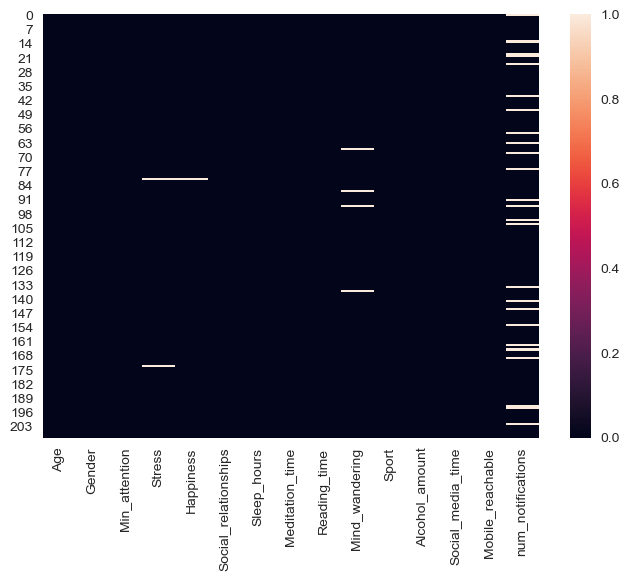

In [6]:
sns.heatmap(df.isna(),)

Missing Completely at Random (MCAR): The values are genuinely missing by themself and have no relation to that or any other observation.

For the 'Stress', 'Happiness' and 'Mind_wandering' variables, the median will be used. 

Finally, NaN values in 'num_notificacion' will be replaced by 0, as after reading again the options, there is no option for not having notifications. As all the people have asnwered all the test, it will be assumed that in that question there was no correct answer for them as the option of '0' was not there.

In [7]:
# Replace NaN values with 0 in the specified column
df['num_notifications'] = df['num_notifications'].fillna(0)

# Fill missing values in 'Stress' with the median of 'Stress'
stress_median = df['Stress'].median()
df['Stress'].fillna(stress_median, inplace=True)

# Fill missing values in 'Happiness' with the median of 'Happiness'
happiness_median = df['Happiness'].median()
df['Happiness'].fillna(happiness_median, inplace=True)

# Fill missing values in 'Happiness' with the median of 'Happiness'
Mind_wandering_median = df['Mind_wandering'].median()
df['Mind_wandering'].fillna(Mind_wandering_median, inplace=True)

In [8]:
pd.DataFrame({'Null_count':df.isna().sum(),'%_of_null_values':(df.isnull().sum()/df.shape[0])*100})


,Null_count,%_of_null_values
Age,0,0.00
Gender,0,0.00
Min_attention,0,0.00
Stress,0,0.00
Happiness,0,0.00
Social_relationships,0,0.00
Sleep_hours,0,0.00
Meditation_time,0,0.00
Reading_time,0,0.00
Mind_wandering,0,0.00


## Análisis estadístico

As the dataset contains several ordinal variables, ordered by their ranks, it will be assumed that all variables are numeric so it will help to perform the analysis.

In [9]:
df_num = df.copy()
df_num = df_num.astype('int')
#Remove binary variables
df_num = df_num.drop(columns= ['Gender', 'Mobile_reachable'])
df_num.dtypes

Age                     int32
Min_attention           int32
Stress                  int32
Happiness               int32
Social_relationships    int32
Sleep_hours             int32
Meditation_time         int32
Reading_time            int32
Mind_wandering          int32
Sport                   int32
Alcohol_amount          int32
Social_media_time       int32
num_notifications       int32
dtype: object

In [10]:
df_binary = df[['Gender', 'Mobile_reachable']]
df_binary = df_binary.astype('category')
df_binary.head()

,Gender,Mobile_reachable
0,0,0
1,0,1
2,1,1
3,0,1
4,0,1


Some statistics will be summarised. As the vast part of the variables are ordinal, the median and the mode will be also calculated.

In [11]:
# Resumen de datos
summary = df_num.describe()
# Mediana
median = df_num.median()

# Moda
mode = df_num.mode().iloc[0]
summary.loc['median'] = median
summary.loc['mode'] = mode


#summary.to_csv('summary_ordinal_results.csv', index=True)
# Display the updated summary
summary



,Age,Min_attention,Stress,Happiness,Social_relationships,Sleep_hours,Meditation_time,Reading_time,Mind_wandering,Sport,Alcohol_amount,Social_media_time,num_notifications
count,209.00,209.00,209.00,209.00,209.00,209.00,209.00,209.00,209.00,209.00,209.00,209.00,209.00
mean,3.08,5.06,6.26,7.54,3.61,4.43,1.48,3.20,2.93,2.79,1.88,4.78,1.46
std,1.51,2.54,1.95,1.51,1.57,1.01,1.06,2.28,1.44,1.44,1.01,2.63,0.97
min,1.00,1.00,1.00,3.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00
25%,2.00,3.00,5.00,7.00,2.00,4.00,1.00,1.00,2.00,2.00,1.00,3.00,1.00
50%,2.00,5.00,7.00,8.00,3.00,4.00,1.00,3.00,3.00,3.00,2.00,4.00,1.00
75%,5.00,8.00,8.00,9.00,5.00,5.00,1.00,5.00,4.00,4.00,2.00,7.00,2.00
max,6.00,9.00,10.00,10.00,6.00,7.00,5.00,8.00,5.00,6.00,5.00,9.00,3.00
median,2.00,5.00,7.00,8.00,3.00,4.00,1.00,3.00,3.00,3.00,2.00,4.00,1.00
mode,2.00,9.00,7.00,8.00,2.00,5.00,1.00,1.00,3.00,3.00,1.00,3.00,1.00


In [12]:
# Resumen de datos
summary_binary = df_binary.describe()

# Display the updated summary
summary_binary

,Gender,Mobile_reachable
count,209,209
unique,2,2
top,1,1
freq,118,145


### CHECKING OUT IF THE DIFFERENT VARIABLES FOLLOW A NORMAL DISTRIBUTION

In [13]:
# Create an empty list to store DataFrames
result_dfs = []

# Loop through each variable and assess normality
for column in df_num.columns:
    data = df_num[column]
    
    # Perform the Shapiro-Wilk test
    stat, p = stats.shapiro(data)
    
    # Create a DataFrame for the test result
    test_result_df = pd.DataFrame({
        'Variable': [column],
        'Shapiro_Test_Statistic': [stat],
        'Shapiro_Test_P_Value': [p],
        #'Shapiro_Test_Result': ["Follows Normal Distribution" if p > 0.05 else "Does Not Follow Normal Distribution"]
        'Shapiro_Test_Result': ["Sigue una distribución normal" if p > 0.05 else "No sigue una distribución normal"]
    })

    # Append the DataFrame to the list
    result_dfs.append(test_result_df)

# Concatenate all DataFrames in the list into a single DataFrame
result_df = pd.concat(result_dfs, ignore_index=True)

#save
result_df.to_csv('shapiro_test_results.csv', index=True)

# Display the result DataFrame
result_df



,Variable,Shapiro_Test_Statistic,Shapiro_Test_P_Value,Shapiro_Test_Result
0,Age,0.87,0.00,No sigue una distribución normal
1,Min_attention,0.90,0.00,No sigue una distribución normal
2,Stress,0.95,0.00,No sigue una distribución normal
3,Happiness,0.92,0.00,No sigue una distribución normal
4,Social_relationships,0.91,0.00,No sigue una distribución normal
5,Sleep_hours,0.91,0.00,No sigue una distribución normal
6,Meditation_time,0.51,0.00,No sigue una distribución normal
7,Reading_time,0.85,0.00,No sigue una distribución normal
8,Mind_wandering,0.88,0.00,No sigue una distribución normal
9,Sport,0.90,0.00,No sigue una distribución normal


### ASSESSING CORRELATIONS BETWEEN VARIABLES

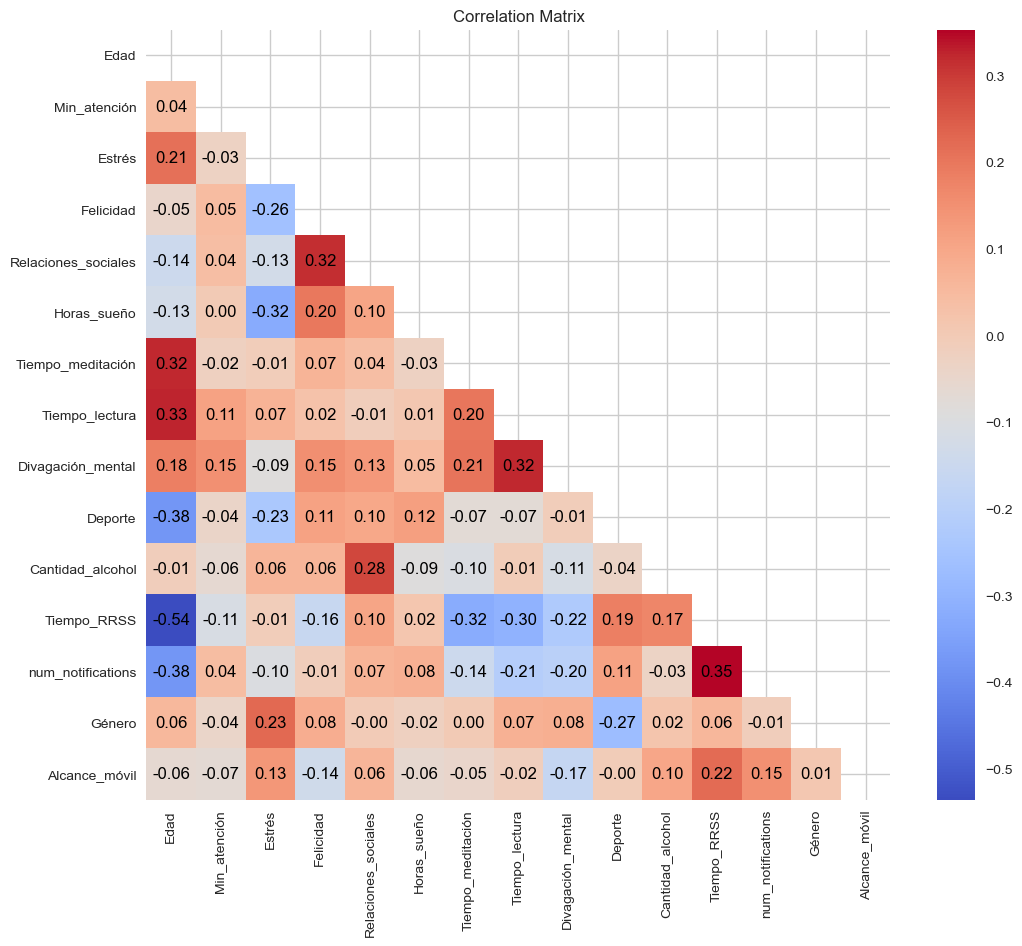

In [14]:
# Assuming df_num and df_binary are your DataFrames with numerical and binary columns, respectively

new_names_spanish_df_num = ['Edad', 'Min_atención', 'Estrés', 'Felicidad', 'Relaciones_sociales', 'Horas_sueño', 'Tiempo_meditación', 'Tiempo_lectura', 'Divagación_mental', 'Deporte', 'Cantidad_alcohol', 'Tiempo_RRSS', 'num_notifications']
new_names_spanish_df_cat = ['Género', 'Alcance_móvil']

df_num_spanish = df_num.copy()
df_num_spanish.columns = new_names_spanish_df_num

df_binary_spanish = df_binary.copy()
df_binary_spanish.columns = new_names_spanish_df_cat


# Create a list to store the variable names
variables = list(df_num_spanish.columns) + list(df_binary_spanish.columns)

# Create an empty correlation matrix
num_vars = len(variables)
correlation_matrix = np.zeros((num_vars, num_vars))

# Calculate Spearman correlation for ordinal variables
for i, col_num1 in enumerate(df_num_spanish.columns):
    for j, col_num2 in enumerate(df_num_spanish.columns):
        correlation, _ = spearmanr(df_num_spanish[col_num1], df_num_spanish[col_num2])
        correlation_matrix[i, j] = correlation

# Calculate Spearman correlation for ordinal-binary pairs in both directions
for i, col_num in enumerate(df_num_spanish.columns):
    for j, col_bin in enumerate(df_binary_spanish.columns):
        if df_binary_spanish[col_bin].nunique() == 2:
            correlation, _ = spearmanr(df_num_spanish[col_num], df_binary_spanish[col_bin])
            correlation_matrix[i, j + len(df_num_spanish.columns)] = correlation
            correlation_matrix[j + len(df_num_spanish.columns), i] = correlation  # Mirror the correlation

# Calculate Chi-square test with correction for binary-binary pairs
for i, col_bin1 in enumerate(df_binary_spanish.columns):
    for j, col_bin2 in enumerate(df_binary_spanish.columns):
        # Create a contingency table
        contingency_table = pd.crosstab(df_binary_spanish[col_bin1], df_binary_spanish[col_bin2])
        
        # Perform Chi-square test with Yates' correction
        chi2, p, _, _ = chi2_contingency(contingency_table, correction=True)
        
        correlation_matrix[i + len(df_num_spanish.columns), j + len(df_num_spanish.columns)] = chi2

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
# Create a mask to hide the upper triangle of the matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=False, xticklabels=variables, yticklabels=variables, cmap='coolwarm', mask=mask)

# Display the numerical values on top of the heatmap
for i in range(num_vars):
    for j in range(num_vars):
        if not mask[i, j]:
            text = plt.text(j + 0.5, i + 0.5, f"{correlation_matrix[i, j]:.2f}", ha='center', va='center', color='black')

plt.title("Correlation Matrix")
plt.show()

## Visualization of variables

In [15]:
# Convert all columns to ordered categorical data types
df_num_to_cat = df.copy()

for col in df_num_to_cat.columns:
    df_num_to_cat[col] = df_num_to_cat[col].astype('category').cat.as_ordered()

In [16]:
new_names_df_num_to_cat_spanish = ['Edad','Género', 'Min_atención', 'Estrés', 'Felicidad', 'Relaciones_sociales', 'Horas_sueño', 'Tiempo_meditación', 'Tiempo_lectura', 'Divagación_mental', 'Deporte', 'Cantidad_alcohol', 'Tiempo_RRSS', 'Alcance_móvil', 'num_notifications']

df_num_to_cat_spanish = df_num_to_cat.copy()
df_num_to_cat_spanish.columns = new_names_df_num_to_cat_spanish

df_num_to_cat_spanish.dtypes

Edad                   category
Género                 category
Min_atención           category
Estrés                 category
Felicidad              category
Relaciones_sociales    category
Horas_sueño            category
Tiempo_meditación      category
Tiempo_lectura         category
Divagación_mental      category
Deporte                category
Cantidad_alcohol       category
Tiempo_RRSS            category
Alcance_móvil          category
num_notifications      category
dtype: object

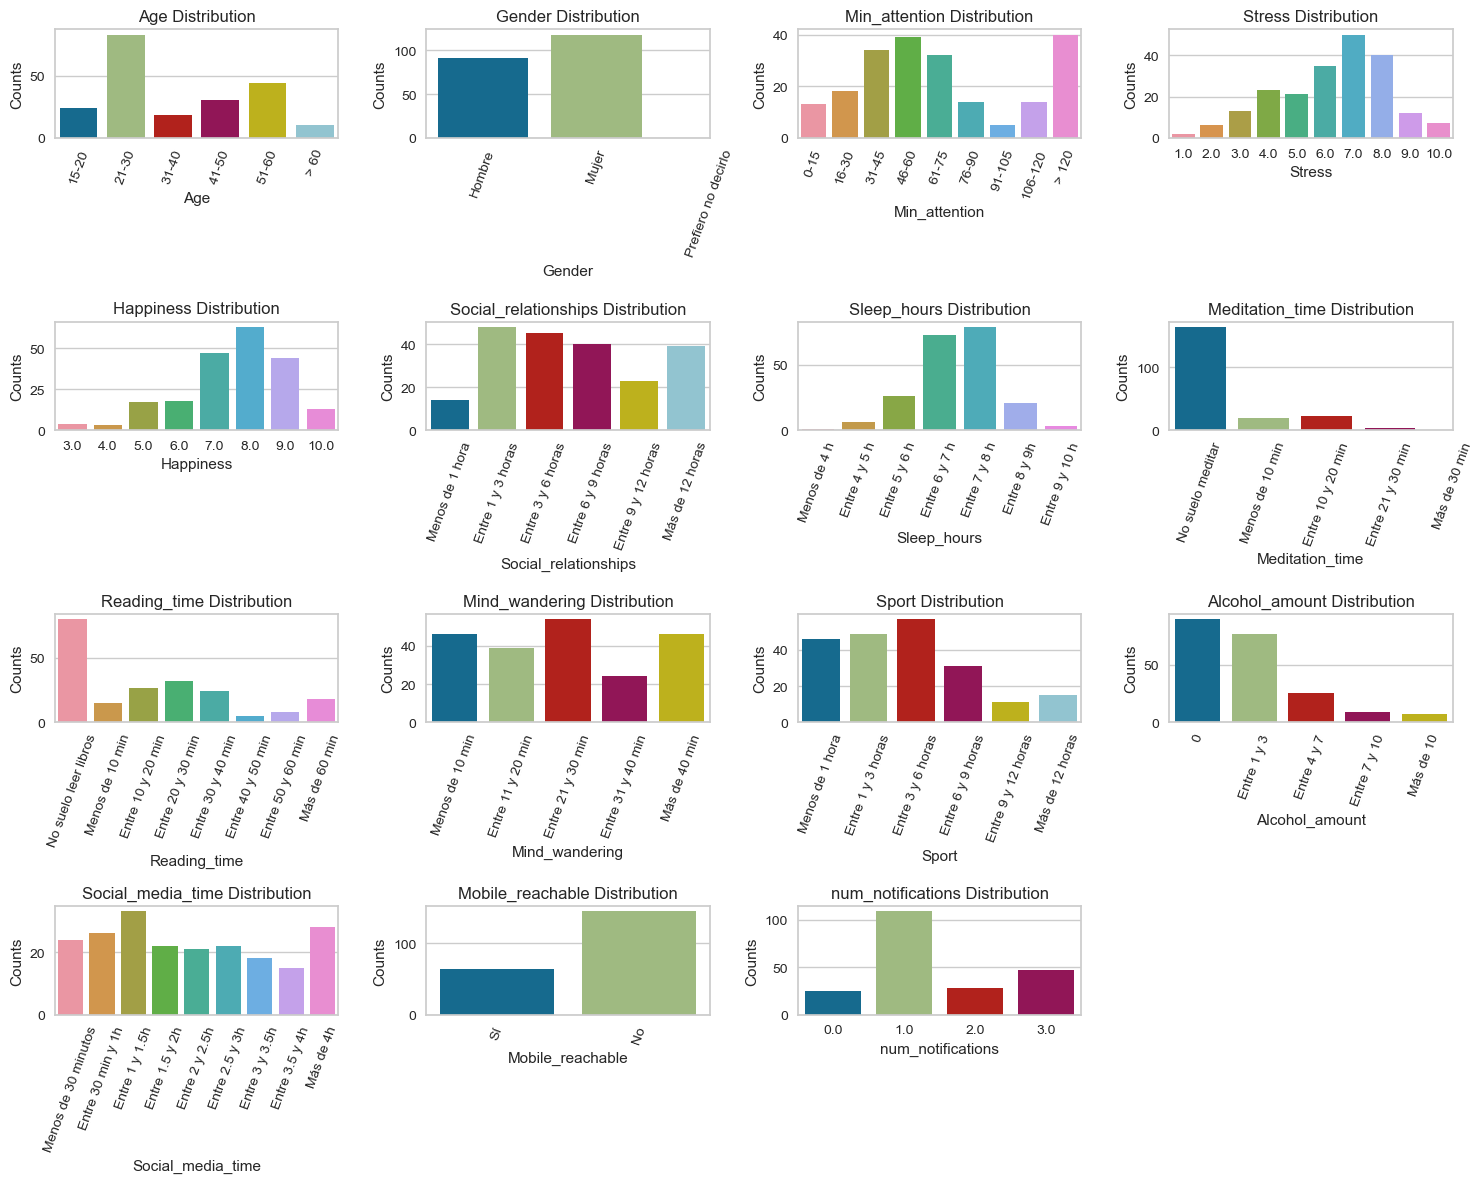

In [17]:
warnings.filterwarnings("ignore", category=FutureWarning)

# Create a list of columns to which you want to apply the mapping
columns_to_map = ['Age', 'Gender', 'Min_attention', 'Social_relationships', 'Sleep_hours', 'Meditation_time', 'Reading_time', 'Mind_wandering', 'Sport', 'Alcohol_amount', 'Social_media_time', 'Mobile_reachable']

# Create histograms for each variable and plot them using Seaborn
plt.figure(figsize=(15, 12))

n_plots = len(df_num_to_cat.columns)
n_rows = 4
n_cols = 4

for i, col in enumerate(df_num_to_cat.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    
    sns.countplot(data=df_num_to_cat, x=col)
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.title(f'{col} Distribution')
    plt.xticks(range(len(df_num_to_cat[col].cat.categories)))
    
    if col in columns_to_map and isinstance(df_num_to_cat[col].dtype, pd.CategoricalDtype):
        # df_num[col] = df_num[col].map(mapping_dict_ordered[col])
    
        # Set the x-axis labels to class labels directly from the mapping_dict_ordered
        labels = list(mapping_dict_ordered[col].keys())
        plt.xticks(range(len(labels)), labels, rotation=70)

plt.tight_layout()
plt.show()


<Figure size 600x400 with 0 Axes>

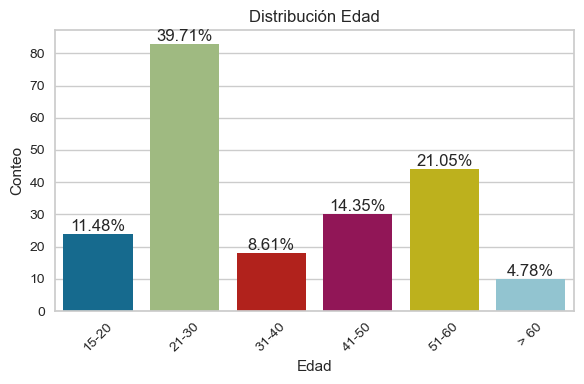

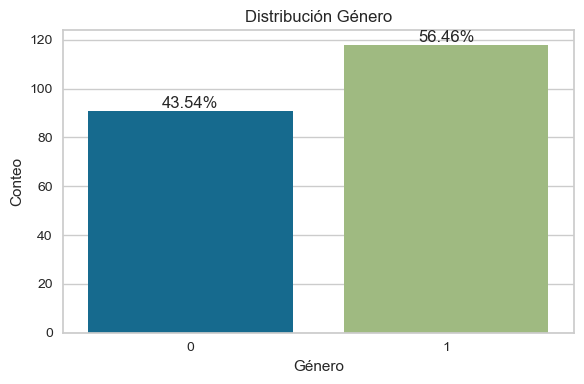

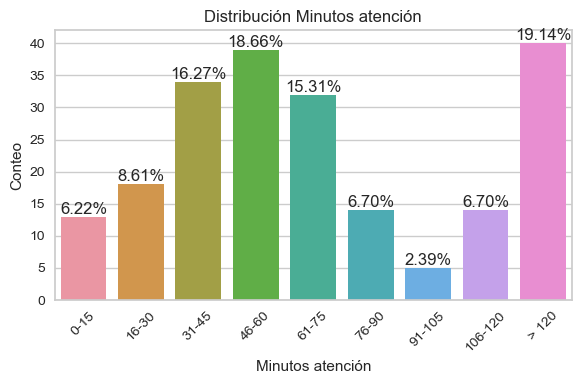

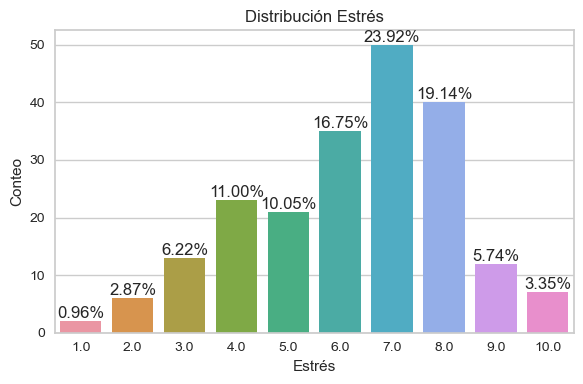

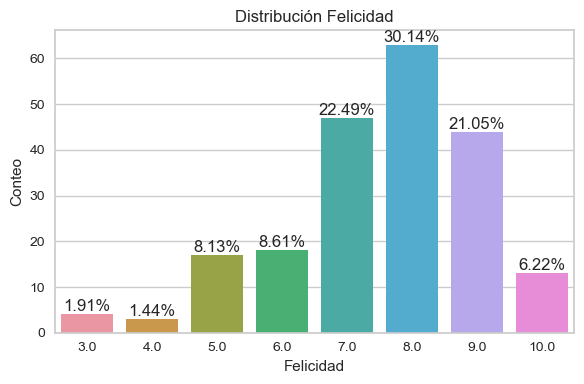

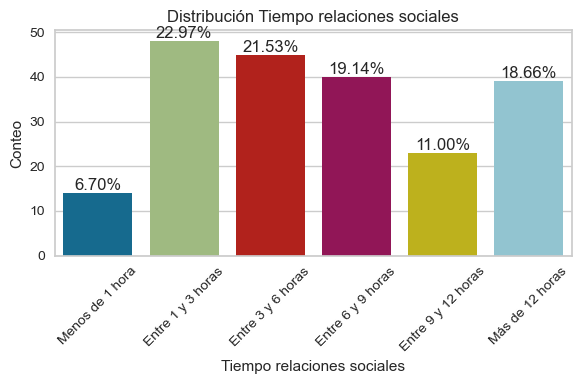

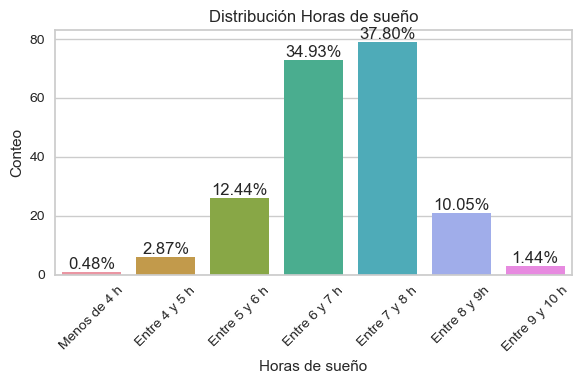

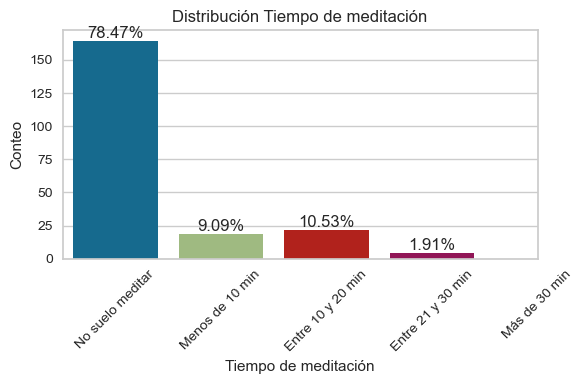

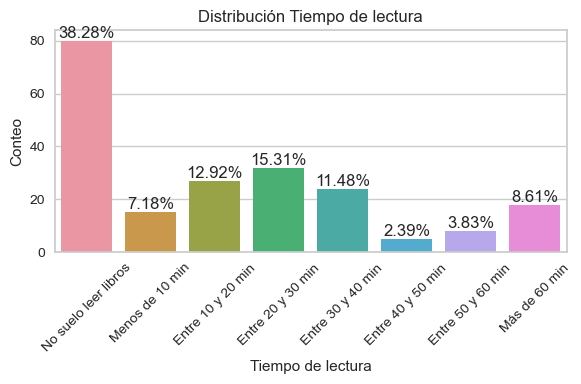

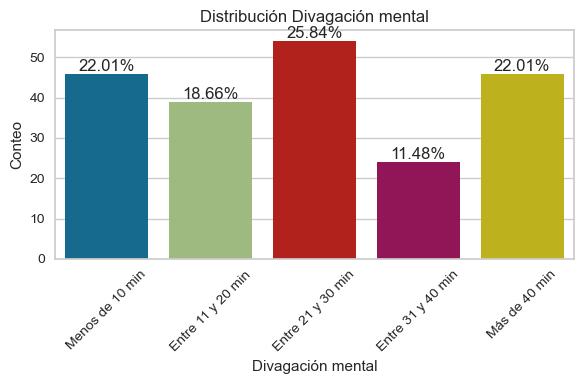

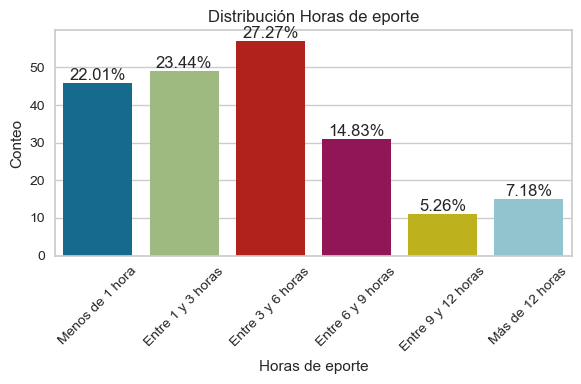

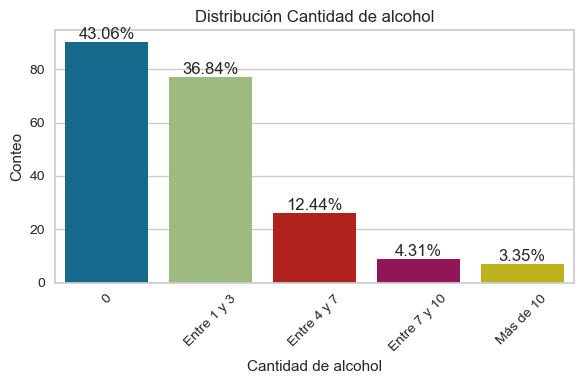

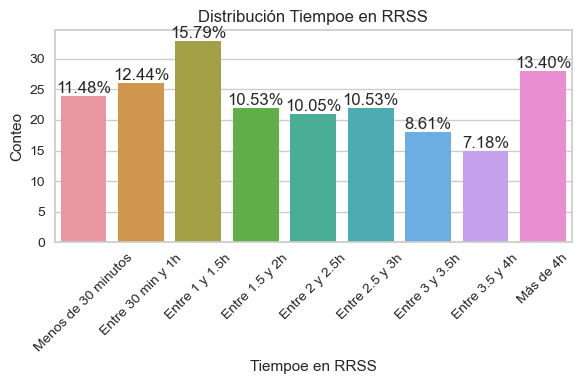

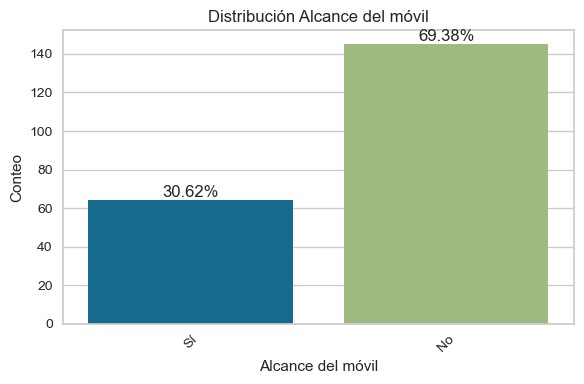

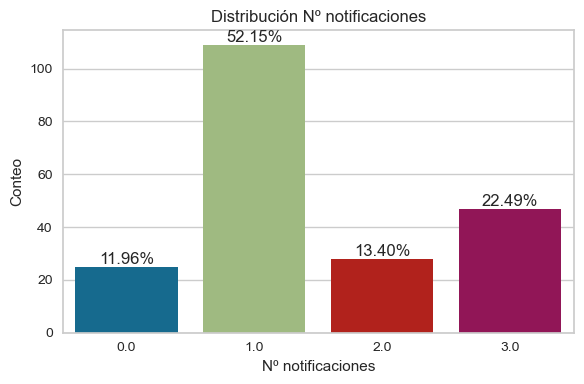

In [18]:
# Create a dictionary for mapping English to Spanish column names
english_to_spanish = {
    'Age': 'Edad',
    'Gender': 'Género',
    'Min_attention': 'Minutos atención',
    'Stress': 'Estrés',
    'Happiness': 'Felicidad',
    'Social_relationships': 'Tiempo relaciones sociales',
    'Sleep_hours': 'Horas de sueño',
    'Meditation_time': 'Tiempo de meditación',
    'Reading_time': 'Tiempo de lectura',
    'Mind_wandering': 'Divagación mental',
    'Sport': 'Horas de eporte',
    'Alcohol_amount': 'Cantidad de alcohol',
    'Social_media_time': 'Tiempoe en RRSS',
    'Mobile_reachable': 'Alcance del móvil',
    'num_notifications': 'Nº notificaciones'
}

# Create a list of columns to which you want to apply the mapping
columns_to_map = ['Age', 'Min_attention', 'Social_relationships', 'Sleep_hours', 'Meditation_time', 'Reading_time', 'Mind_wandering', 'Sport', 'Alcohol_amount', 'Social_media_time', 'Mobile_reachable']

# Set the width and height of the figures
fig_width = 6
fig_height = 4
plt.figure(figsize=(fig_width, fig_height))

for i, col in enumerate(df_num_to_cat.columns, 1):
    # Use order parameter to specify the order of categories
    order = list(df_num_to_cat[col].cat.categories)
    plt.figure(figsize=(fig_width, fig_height))
    ax = sns.countplot(data=df_num_to_cat, x=col, order=order)
    plt.xlabel(english_to_spanish[col])  # Use Spanish column name here
    plt.ylabel('Conteo')
    plt.title(f'Distribución {english_to_spanish[col]}')
    plt.xticks(range(len(df_num_to_cat[col].cat.categories)))
    
    if col in columns_to_map and df_num_to_cat[col].dtype.name == 'category':
        # Set the x-axis labels to class labels directly from the mapping_dict_ordered
        labels = list(mapping_dict_ordered[col].keys())
        plt.xticks(range(len(labels)), labels, rotation=45) #va="center"
    
    # Add count and proportions inside the bars
    total = len(df_num_to_cat[col])
    for p in ax.patches:
        height = p.get_height()
        #ax.text(p.get_x() + p.get_width() / 2., height, f'{height}', ha="center", va="bottom")
        ax.text(p.get_x() + p.get_width() / 2., height, f'{height/total:.2%}', ha="center", va="bottom")



    plt.tight_layout()        
    # Save figure as a .png file
    plt.savefig(f'{col}_distribution.png')
    plt.show()


In [20]:
import plotly.express as px
import plotly.offline as pyo
import ipywidgets as widgets
from IPython.display import display

df_copy_2 = df.copy()
# Create a dynamic histogram plot using Plotly
def create_histogram(variable_name):
    if variable_name in columns_to_map:
        values_list = df_copy_2[variable_name].tolist()
        # Sort the list
        sorted_values = sorted(values_list)
        # Update the original DataFrame with the sorted values
        df_copy_2[variable_name] = sorted_values
        # Reverse the mapping
        reverse_mapping = {v: k for k, v in mapping_dict_ordered[variable_name].items()}
        df_copy_2[variable_name] = df_copy_2[variable_name].replace(reverse_mapping)

    fig = px.histogram(df_copy_2, x=variable_name, title=f'{variable_name} Distribution')
    fig.update_traces(marker=dict(line=dict(width=0)))
    fig.update_layout(bargap=0.2)
    
    # Calculate proportions using the original order of categories
    original_order_proportions = df_copy_2[variable_name].value_counts(normalize=True)

    # Add proportions as custom annotations
    annotations = [f'{original_order_proportions[label]:.2%}' for label in df_copy_2[variable_name].unique()]

    # Update the traces to add annotations to the bar labels
    fig.update_traces(text=annotations, hoverinfo='text+y')

    fig.show()

    # Save the plot to an HTML file with the variable name in the filename
    pyo.plot(fig, filename=f'{variable_name}_distribution.html', auto_open=False)

# Iterate over all columns and create histograms
variable_selector = widgets.Dropdown(options=df_copy_2, description='Select Variable:')
for column in df_copy_2.columns:
    create_histogram(column)




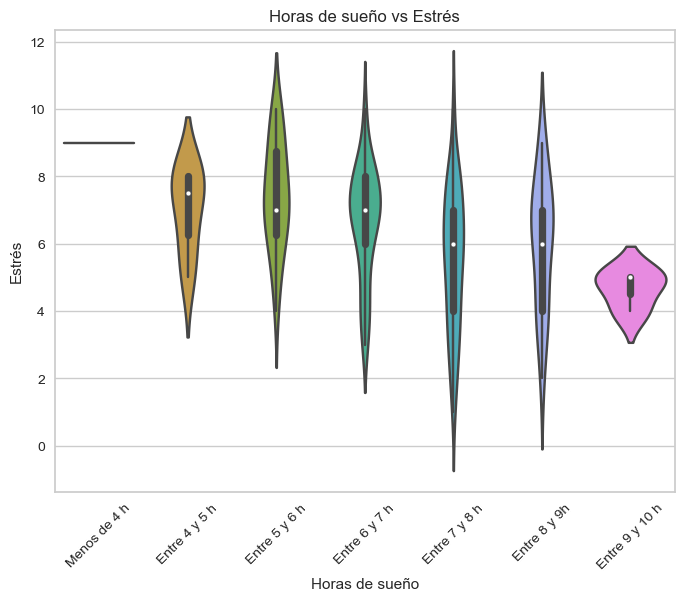

In [21]:
# Violin Plot
data= df
plt.figure(figsize=(8, 6))
sns.violinplot(data=data, x='Sleep_hours', y='Stress')
plt.title("Horas de sueño vs Estrés")
plt.xlabel("Horas de sueño")
plt.ylabel("Estrés")

xlabel = list(mapping_dict_ordered['Sleep_hours'].keys())
plt.xticks(range(len(xlabel)), xlabel, rotation=45) #va="center"

plt.show()

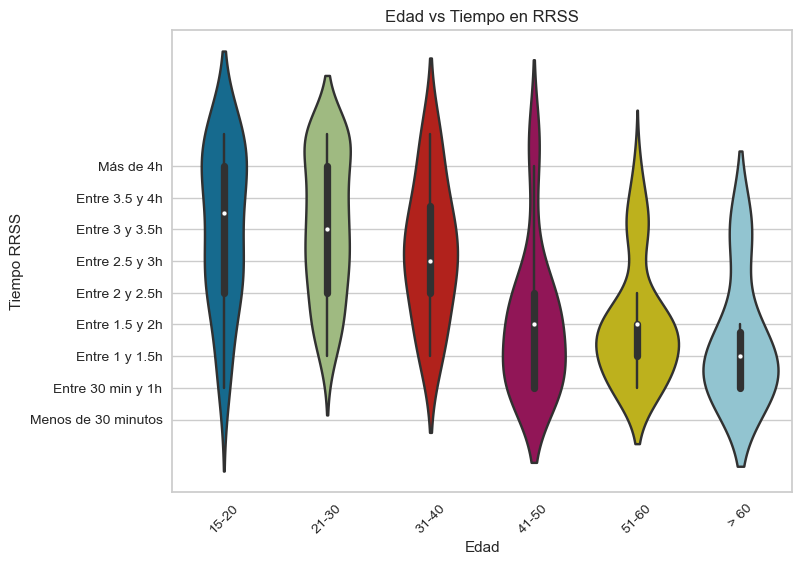

In [22]:
# Violin Plot
data= df
plt.figure(figsize=(8, 6))
sns.violinplot(data=data, x='Age', y='Social_media_time')
plt.title("Edad vs Tiempo en RRSS")

xlabel = list(mapping_dict_ordered['Age'].keys())
plt.xticks(range(len(xlabel)), xlabel, rotation=45) #va="center"

ylabel = list(mapping_dict_ordered['Social_media_time'].keys())
plt.yticks(range(len(ylabel)), ylabel, rotation=0) #va="center"

plt.xlabel("Edad")
plt.ylabel("Tiempo RRSS")
plt.show()

<Figure size 700x400 with 0 Axes>

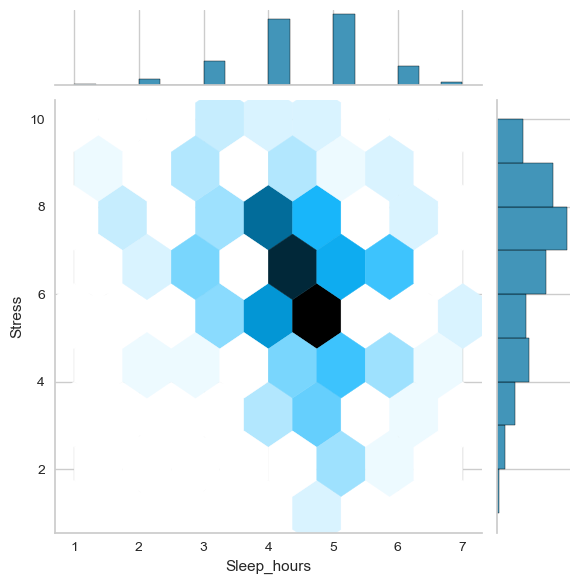

In [23]:
plt.figure(figsize=(7, 4))
sns.jointplot(data = df_num, x='Sleep_hours', y='Stress',
                  kind= 'hex', gridsize = 8)

xlabels = list(mapping_dict_ordered['Sleep_hours'].keys())
plt.xticks(range(len(xlabels)), xlabels, rotation=45) #va="center"

plt.ylabel('Stress')
plt.show()

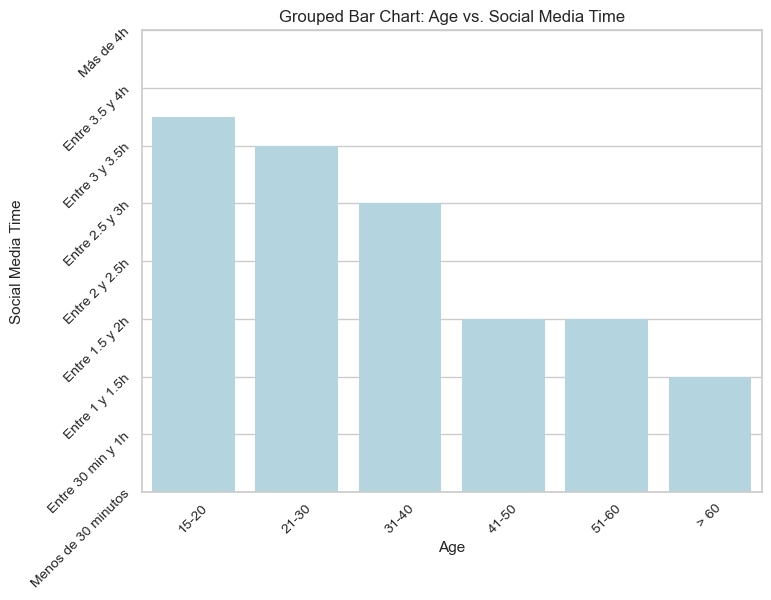

In [24]:
# Group the data by "Age" and calculate the median "Social_media_time" for each group
grouped_data = df_num.groupby('Age')['Social_media_time'].median().reset_index()

# Create a grouped bar chart with mapped axis labels
plt.figure(figsize=(8, 6))
sns.barplot(data=grouped_data, x='Age', y='Social_media_time', color='lightblue')
plt.title("Grouped Bar Chart: Age vs. Social Media Time")
plt.xlabel("Age")
plt.ylabel("Social Media Time")

x_labels = list(mapping_dict_ordered['Age'].keys())
plt.xticks(range(len(x_labels)), x_labels, rotation=45)

y_labels = list(mapping_dict_ordered['Social_media_time'].keys())
plt.yticks(range(len(y_labels)), y_labels, rotation=45)

plt.show()

<Figure size 800x600 with 0 Axes>

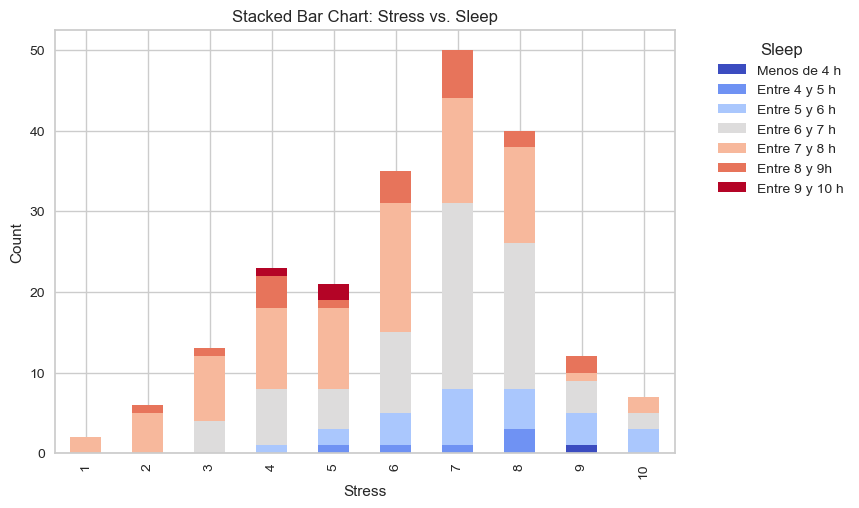

In [25]:
# Create a cross-tabulation to count the frequency of each combination
ct = pd.crosstab(df_num['Stress'], df_num['Sleep_hours'])

# Create a stacked bar chart
plt.figure(figsize=(8, 6))
ct.plot(kind='bar', stacked=True, cmap='coolwarm')
plt.title("Stacked Bar Chart: Stress vs. Sleep")
plt.xlabel("Stress")
plt.ylabel("Count")


x_labels = list(mapping_dict_ordered['Sleep_hours'].keys())
#plt.xticks(range(len(x_labels)), x_labels, rotation=45)
plt.legend(x_labels, title="Sleep", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [31]:
#pip install --upgrade ptitprince

<Axes: >

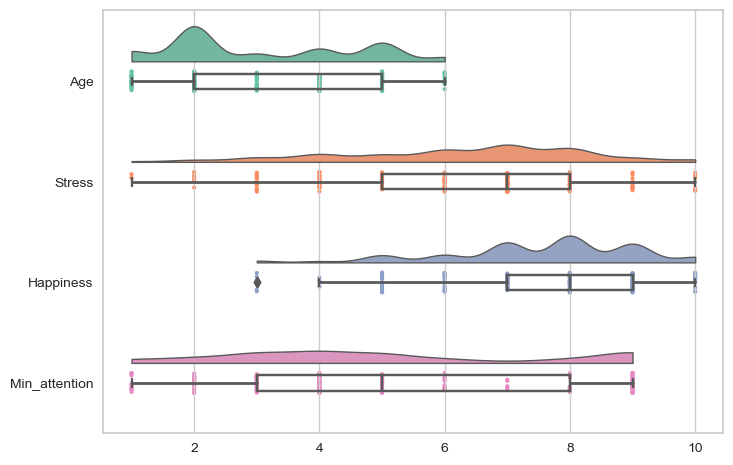

In [45]:
import ptitprince as pt
import pandas as pd
pd.DataFrame.iteritems = pd.DataFrame.items
#f, ax = plt.subplots(figsize=(8, 8))
pt.RainCloud(data = df[['Age', 'Stress', 'Happiness', 'Min_attention']], orient = 'h')


## PCA

In [ ]:
# Perform PCA
pca = PCA()
train_data_pca = pca.fit_transform(df)

# Explained variance by each PCA component
variance_explained = pca.explained_variance_ratio_

# Cumulative variance explained by PCA components
cumulative_variance_explained = np.cumsum(variance_explained)

In [ ]:
# Plot variance explained by PCA components and cumulative variance
data = pd.DataFrame({
    'PCA_Component': np.arange(len(variance_explained)),
    'Variance_Explained': variance_explained,
    'Cumulative_Variance': cumulative_variance_explained
})

plt.figure(figsize=(10, 6))
sns.barplot(x='PCA_Component', y='Variance_Explained', data=data, color='blue')
plt.plot(data['PCA_Component'], data['Cumulative_Variance'], color='red', marker='o', label='Cumulative Variance Explained')
for i, txt in enumerate(data['Cumulative_Variance']):
    plt.annotate(f'{txt:.1%}', (data['PCA_Component'][i], data['Cumulative_Variance'][i] + 0.01), ha='center', va='bottom', fontsize=10)
plt.title("Variance Explained by PCA Components")
plt.xlabel("PCA Component")
plt.ylabel("Variance Explained / Cumulative Variance")
plt.legend()
plt.show()

## Machine learning

In [ ]:
df_cat=df.drop('Min_attention',axis=1)
df_cat.head()

In [ ]:
df_target = df['Min_attention']
df_target.head()

In [ ]:
# Split the data into features (X) and target (y)
X = df_cat  # Select all columns except the last one as features
y = df_target   # Select the last column as the target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)
#models.to_csv('LazyClassifier_results.csv', index=True)

In [ ]:
models
models.to_csv('LazyClassifier_results.csv', index=True)